# Decision Trees

Decision trees are a popular machine learning algorithm used for solving classification and regression problems. In this notebook, we directly apply DecisionTreeClassiier in scikit-learn on the penguin dataset. We also analyze the influence of depth. Besides, DecisionTreeRegressor is applied to build regression model.

In [50]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import export_text
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

## Data Visualization

In [51]:
# Import Personal key indicators of heart disease dataset
df = pd.read_csv("palmer_penguins.txt")

# Remove the rows with NaN values from the dataset
df = df.dropna()
df.head()

,Unnamed: 0,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


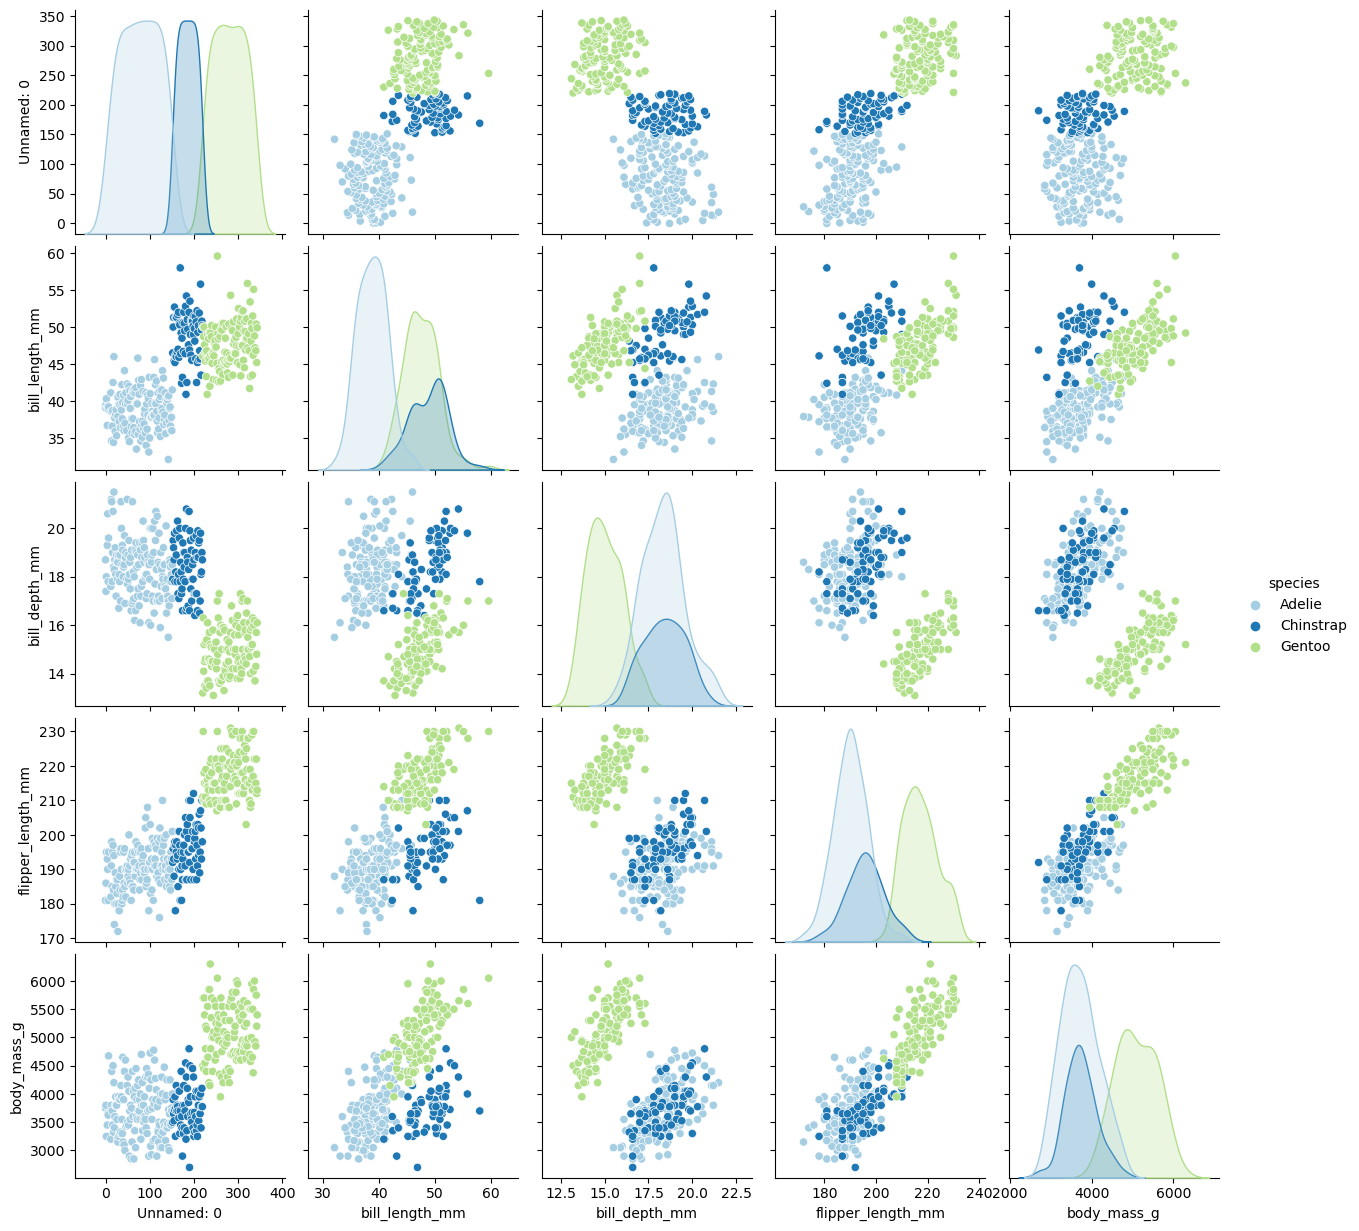

In [5]:
sns.pairplot(df, hue='species',palette='Paired')

From the scatter plot ,We can see that "flipper_length_mm" and "bill_length_mm" can separate the three penguin species well.

Text(0.5, 1.0, 'Penguins Data')

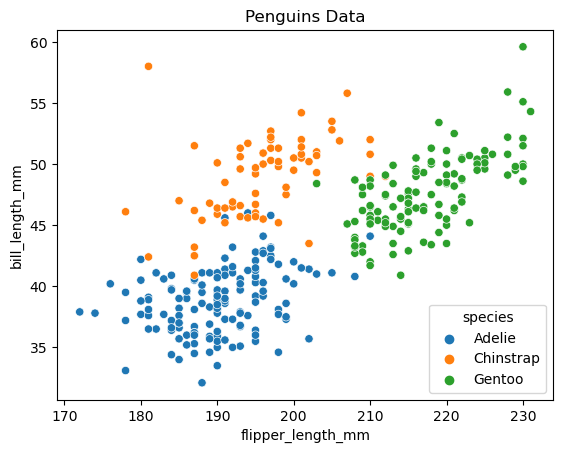

In [16]:
sns.scatterplot(data = df, x = "flipper_length_mm", y = "bill_length_mm", hue = 'species').set_title("Penguins Data")

## Train Decision Tree Model

In [52]:
## covert features to numpy array
X = df[['flipper_length_mm', 'bill_length_mm']].to_numpy()
y = df['species'].to_numpy()

## change species label to numeric label
for i, label in enumerate(y):
    if label == "Adelie":
        y[i] = 0.0
    elif label == "Chinstrap":
        y[i] = 1.0
    else:
        y[i] = 2.0
y = y.astype(int)

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.4,
                                                    random_state = 42)
## instantiate an instance of the sklearn.tree.Decision Tree Classifier model.

decision_tree = DecisionTreeClassifier(max_depth=15, random_state=42)
decision_tree.fit(X_train, y_train)

## Make list for features and labels
features = ["flipper_length_mm", "bill_length_mm"]
labels = ["Adelie", "Chinstrap", "Gentoo"]

We could build a text report showing the rules of the tree.

In [54]:
tree_rules = export_text(decision_tree,
                         feature_names = features)
print(tree_rules)

|--- flipper_length_mm <= 206.50
|   |--- bill_length_mm <= 44.65
|   |   |--- bill_length_mm <= 42.35
|   |   |   |--- class: 0
|   |   |--- bill_length_mm >  42.35
|   |   |   |--- flipper_length_mm <= 191.50
|   |   |   |   |--- class: 1
|   |   |   |--- flipper_length_mm >  191.50
|   |   |   |   |--- class: 0
|   |--- bill_length_mm >  44.65
|   |   |--- bill_length_mm <= 46.05
|   |   |   |--- bill_length_mm <= 45.55
|   |   |   |   |--- class: 1
|   |   |   |--- bill_length_mm >  45.55
|   |   |   |   |--- flipper_length_mm <= 190.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- flipper_length_mm >  190.50
|   |   |   |   |   |--- flipper_length_mm <= 192.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- flipper_length_mm >  192.50
|   |   |   |   |   |   |--- bill_length_mm <= 45.70
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- bill_length_mm >  45.70
|   |   |   |   |   |   |   |--- bill_length_mm <= 45.90
|   |   |   |   |   |

### Visualize the decision tree

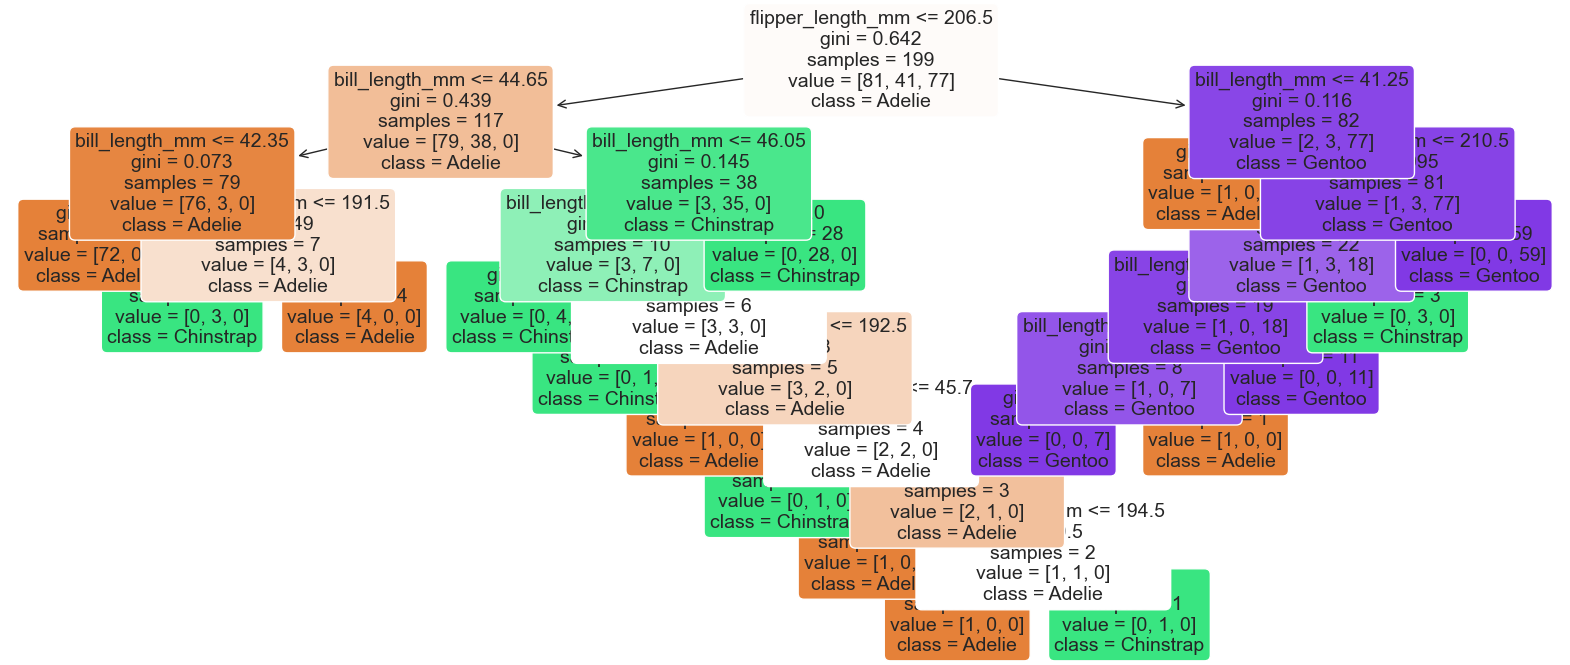

In [55]:
plt.figure(figsize = (20, 8))
a = tree.plot_tree(decision_tree,
                   feature_names = features,
                   class_names = labels,
                   rounded = True,
                   filled = True,
                   fontsize = 14)
plt.show()

### Visualize the Decision Regions

Text(0.5, 1.0, 'Decision Boundaries for Training Data')

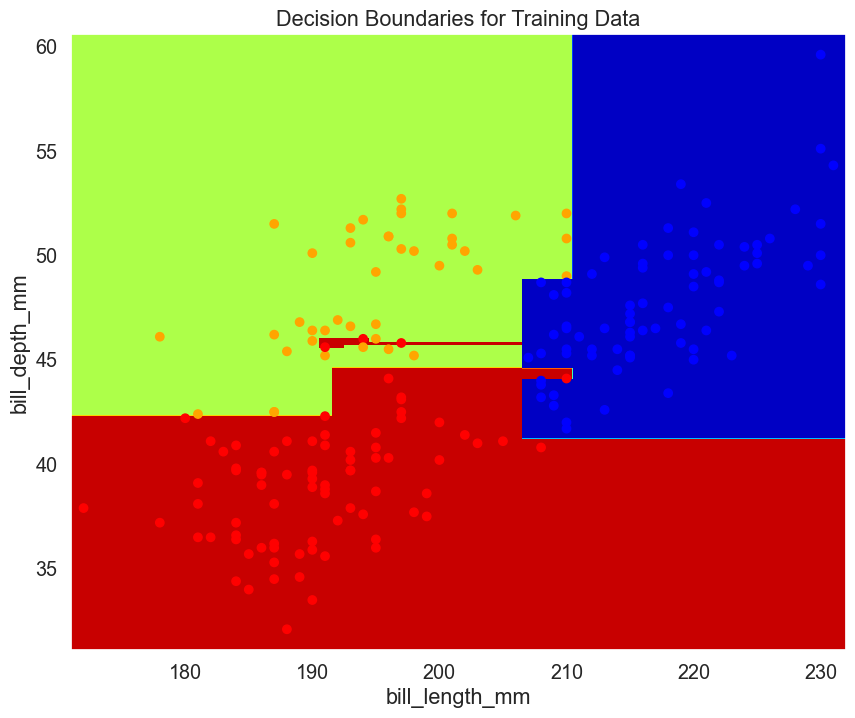

In [56]:
c_train = ["red" if label == 0 else ("orange" if label == 1 else "blue") for label in y_train]
c_test = ["red" if label == 0 else ("orange" if label == 1 else "blue") for label in y_test]

plot_step = 0.02

plt.figure(figsize = (10, 8))


x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))



Z = decision_tree.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap = "jet_r") #blue and red coloring

plt.scatter(X_train[:, 0], X_train[:, 1], c = c_train)
plt.xlabel("bill_length_mm")
plt.ylabel("bill_depth_mm")
plt.title("Decision Boundaries for Training Data")

### Confusion Matrix

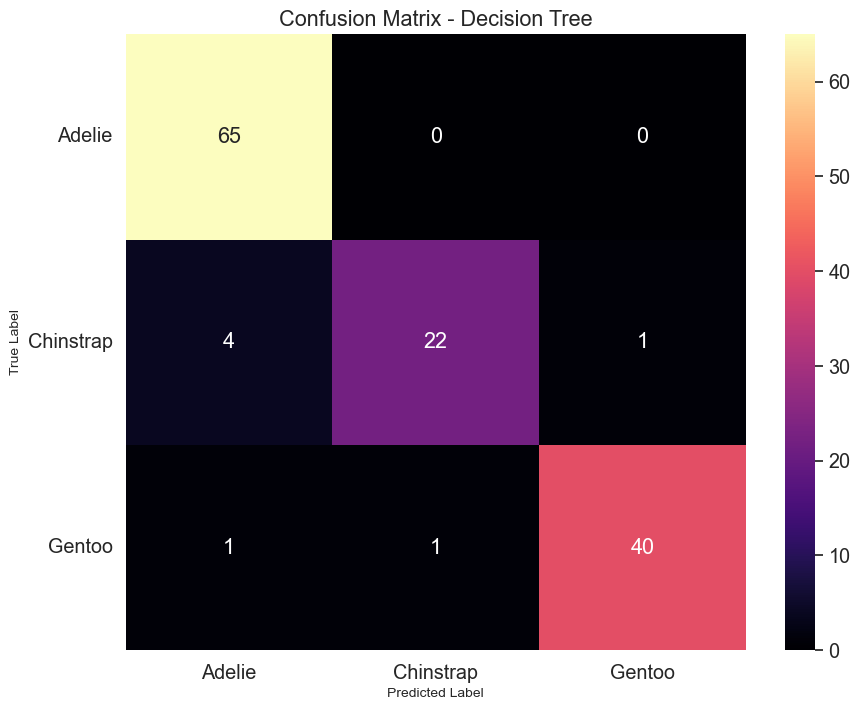

In [57]:
# predicted values on the testing data
test_pred_decision_tree = decision_tree.predict(X_test)

# Change the data type that can fit the usage of confusion matrix tool
y_test = y_test.astype("float64")

# The confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, test_pred_decision_tree)

# Convert confusion matrix into dataframe
matrix_df = pd.DataFrame(confusion_matrix)
# Plot confusion matrix using seaborn
plt.figure(figsize = (10, 8))
ax = plt.axes()
sns.set(font_scale = 1.3)

sns.heatmap(matrix_df,
            annot = True,
            fmt = "g",
            ax = ax,
            cmap = "magma")

ax.set_title("Confusion Matrix - Decision Tree")
ax.set_xlabel("Predicted Label", fontsize = 10)
ax.set_xticklabels(labels)
ax.set_ylabel("True Label", fontsize = 10)
ax.set_yticklabels(labels, rotation = 0)
plt.show()

In [58]:
# Recall and the f1-score
print(metrics.classification_report(y_test, test_pred_decision_tree))

              precision    recall  f1-score   support

         0.0       0.93      1.00      0.96        65
         1.0       0.96      0.81      0.88        27
         2.0       0.98      0.95      0.96        42

    accuracy                           0.95       134
   macro avg       0.95      0.92      0.94       134
weighted avg       0.95      0.95      0.95       134



### Model Accuracy

According to the plot above, we could see the decision tree model has a good performance, then we could calculate the accuracy.

In [59]:
print(f"precision score")

precision = metrics.precision_score(y_test,
                                   test_pred_decision_tree, 
                                   average = None)

precision_results = pd.DataFrame(precision, index  = labels)
precision_results.rename(columns = {0:"precision"}, inplace = True)
precision_results

precision score


,precision
Adelie,0.928571
Chinstrap,0.956522
Gentoo,0.975610


## Influence of Tree Depth

In this part, we change the model depth to 3 to build the new model and compare its performance with the former model to explore the influence of the tree depth.

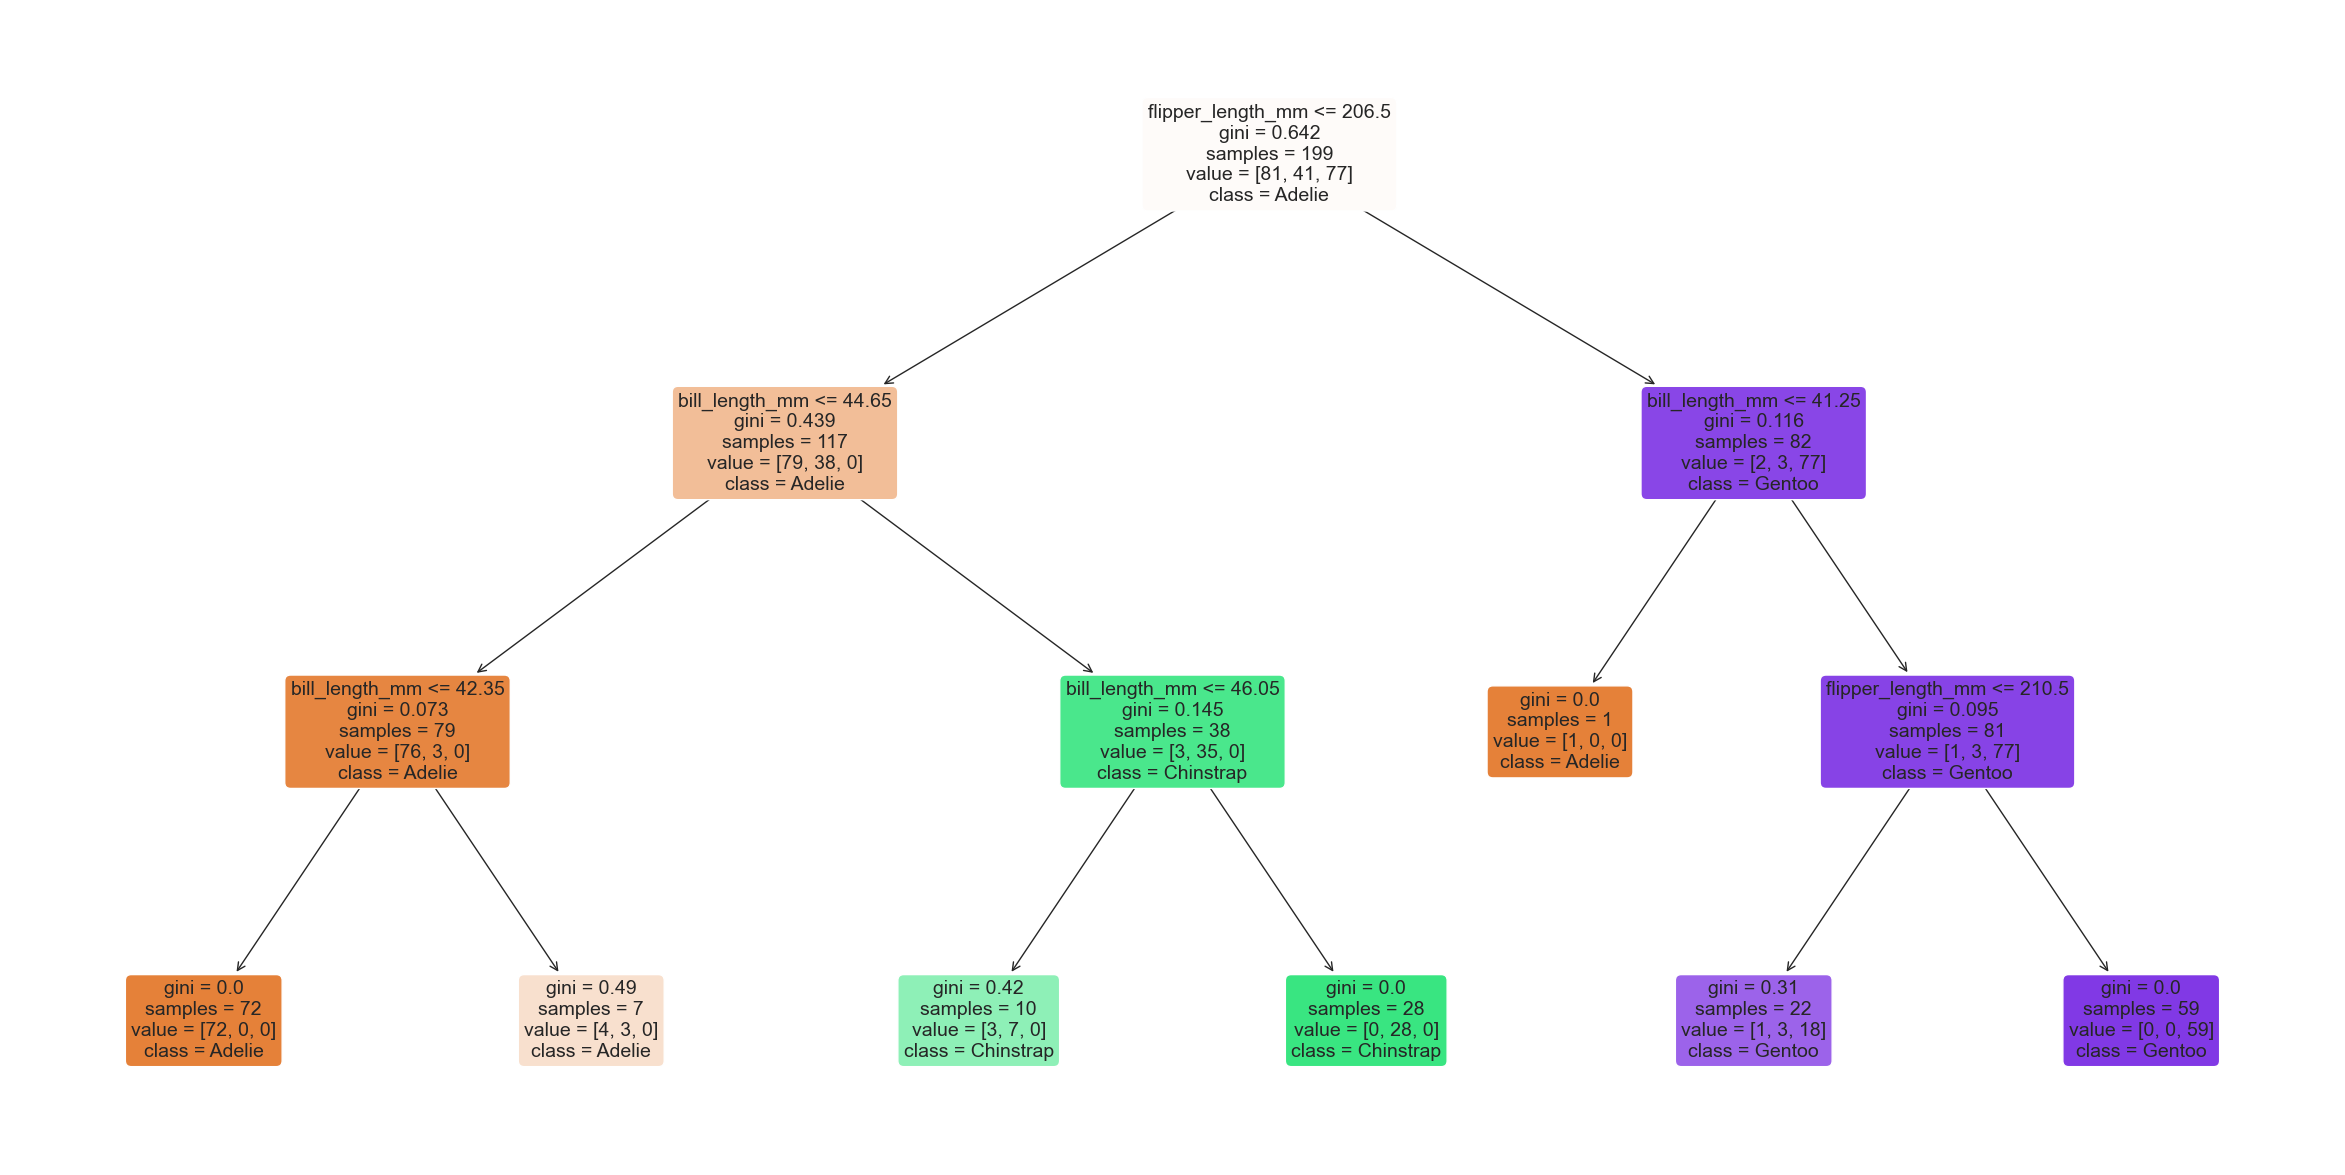

In [60]:

from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(max_depth = 3, random_state = 42)
decision_tree.fit(X_train, y_train)

from sklearn import tree

plt.figure(figsize = (30,15))
a = tree.plot_tree(decision_tree, feature_names = features,
             class_names = labels, 
             rounded = True,
             filled = True, 
             fontsize = 14)
plt.show()

### Confusion Matrix

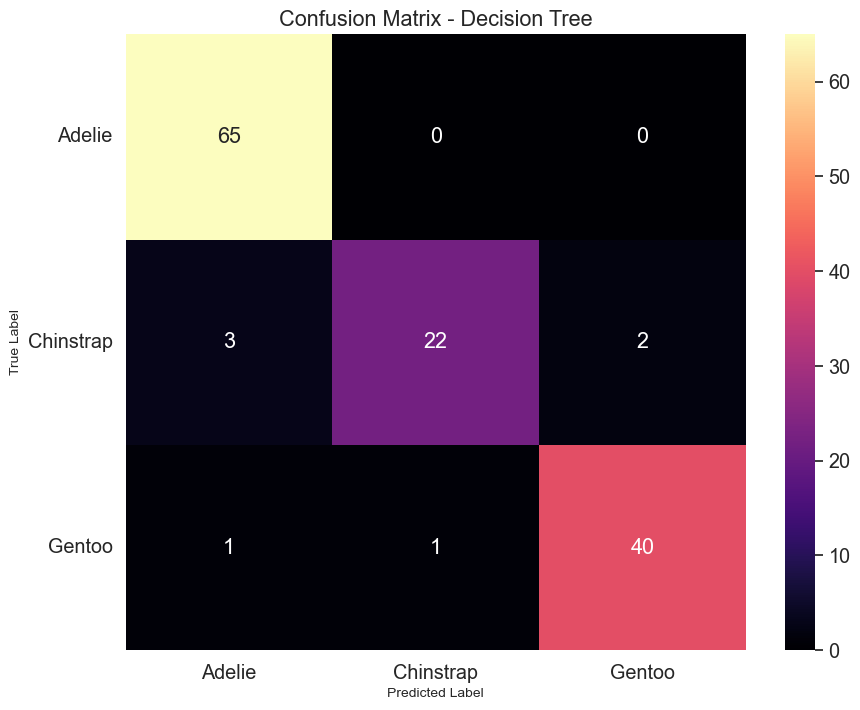

In [61]:

#predicted values on the testing data
test_pred_decision_tree = decision_tree.predict(X_test)

#Import metrices from sklearn 
from sklearn import metrics

#Notes: visulizing your tree above will be weird after running seaborn
import seaborn as sns

#The confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, test_pred_decision_tree)

#COnvert confusion matrix into dataframe
matrix_df = pd.DataFrame(confusion_matrix)

plt.figure(figsize = (10,8))
ax = plt.axes()
sns.set(font_scale = 1.3)
sns.heatmap(matrix_df,
           annot = True, 
           fmt = "g",
           ax = ax,
           cmap = "magma")
ax.set_title("Confusion Matrix - Decision Tree")
ax.set_xlabel("Predicted Label", fontsize = 10)
ax.set_xticklabels(labels)
ax.set_ylabel("True Label", fontsize = 10)
ax.set_yticklabels(labels, rotation = 0)
plt.show()

### Model Accuracy

According to the model accuracy, we could see there does not exist significant decrease on the model accuracy. Therefore, we could choose the model with lower tree depth to avoid overfitting.

In [62]:
print(f"precision score")

precision = metrics.precision_score(y_test,
                                   test_pred_decision_tree, 
                                   average = None)

precision_results = pd.DataFrame(precision, index  = labels)
precision_results.rename(columns = {0:"precision"}, inplace = True)
precision_results

precision score


,precision
Adelie,0.942029
Chinstrap,0.956522
Gentoo,0.952381


## Regression Model

Decision trees can also be applied to regression problems, using the DecisionTreeRegressor class.


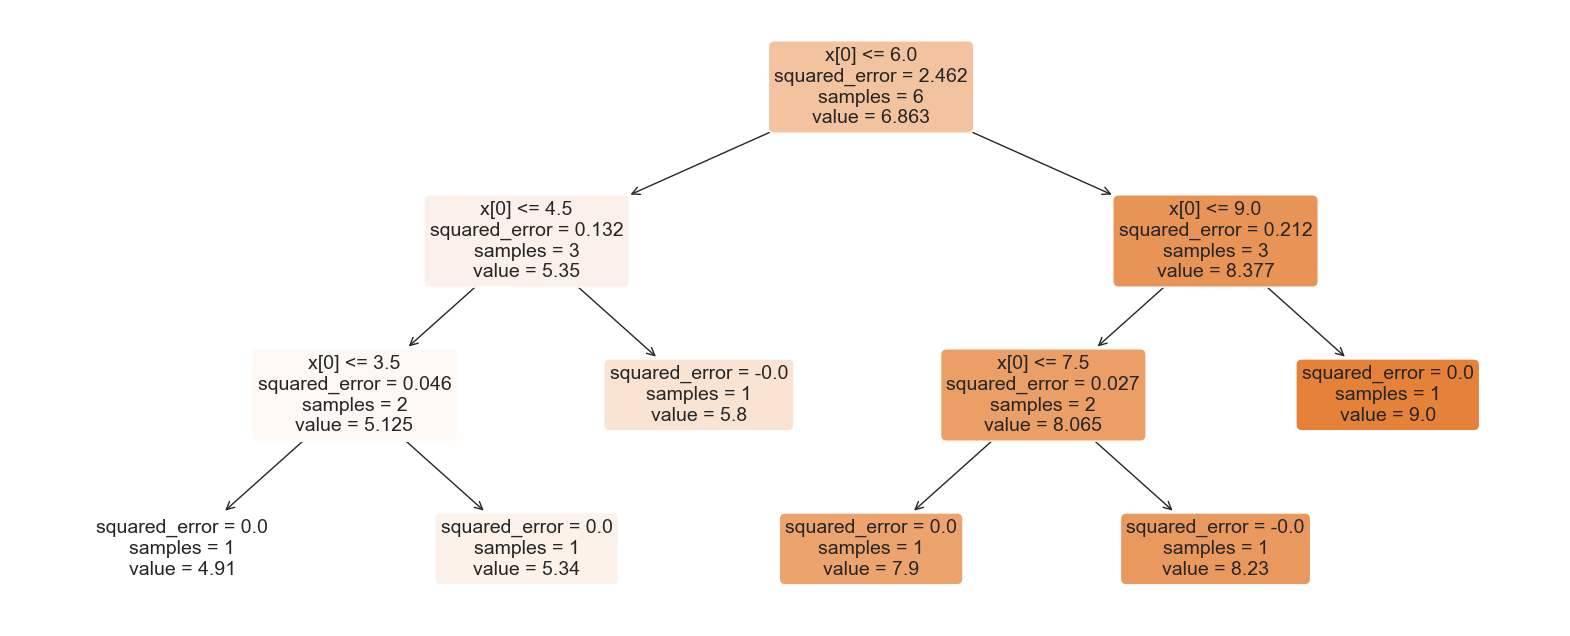

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn import linear_model

# Data set
x = np.array(list(range(1, 11))).reshape(-1, 1)
y = np.array([4.50, 4.75, 4.91, 5.34, 5.80, 7.05, 7.90, 8.23, 8.70, 9.00]).ravel()

# Fit regression model
model1 = DecisionTreeRegressor(max_depth=1)
model2 = DecisionTreeRegressor(max_depth=3)
model3 = linear_model.LinearRegression()
model1.fit(x, y)
model2.fit(x, y)
model3.fit(x, y)

# Predict
X_test = np.arange(0.0, 10.0, 0.01)[:, np.newaxis]
y_1 = model1.predict(X_test)
y_2 = model2.predict(X_test)
y_3 = model3.predict(X_test)

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.40, random_state=42)
tree_reg = DecisionTreeRegressor(max_depth=5, random_state=42)
tree_reg.fit(x_train, y_train)

# visualize the regression tree
from sklearn import tree

plt.figure(figsize=(20,8))
a = tree.plot_tree(tree_reg,
                   feature_names = None,
                   class_names = None,
                   rounded = True,
                   filled = True,
                   fontsize = 14)

plt.show()